In [61]:
!pip install plotly
!pip install pandasql
import os
from pandas import Series
import pandasql
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
sns.set(color_codes=True)
from pandas import read_csv
import matplotlib as mpl
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [62]:
# This funtion takes the file and checks & processes
def LoadFile(dataFileName):
    isExisted = os.path.isfile(dataFileName)
    if isExisted == True: # Read in the data when the file does exist
        df = pd.read_csv(dataFileName, encoding = 'latin-1')
    else: # Print our message when the file provide does not exist
        print("File name:", dataFileName, "does not exist in", os.getcwd(), "folder")
    return pd.DataFrame(df)

In [63]:
# Load files by using LoadFile function defines above
states_by_county_death = LoadFile("data/COVID-19_Death_Counts_in_the_United_States_by_County.csv")
state = LoadFile("data/State.csv")
us_counties_cases_deathss = LoadFile("data/us_counties.csv")
us_counties_cases_deaths = LoadFile("data/us_counties_cases_deaths.csv")
detail_2018_county_health_rankings = LoadFile("data/detail_2018_county_health_rankings.csv")
overall_2018_county_health_ranking = LoadFile("data/overall_2018_county_health_ranking.csv")

In [64]:
states_by_county_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date as of                 461 non-null    object
 1   First week                 461 non-null    object
 2   Last week                  461 non-null    object
 3   State                      461 non-null    object
 4   County name                461 non-null    object
 5   FIPS County Code           461 non-null    int64 
 6   Deaths involving COVID-19  461 non-null    int64 
 7   Deaths from All Causes     461 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 28.9+ KB


In [65]:
for column in states_by_county_death.columns:
    states_by_county_death.rename(columns={column: column.replace(' ', '_')}, inplace=True)
states_by_county_death.rename(columns={'County_name': 'County_Name'}, inplace=True)

In [66]:
states_by_county_death['County_Name'] = states_by_county_death['County_Name'].str.replace(' County', '')

In [67]:
states_by_county_death.head()

,Date_as_of,First_week,Last_week,State,County_Name,FIPS_County_Code,Deaths_involving_COVID-19,Deaths_from_All_Causes
0,5/20/2020,2/1/2020,5/16/2020,AL,Etowah,1055,11,432
1,5/20/2020,2/1/2020,5/16/2020,AL,Houston,1069,24,542
2,5/20/2020,2/1/2020,5/16/2020,AL,Jefferson,1073,79,2675
3,5/20/2020,2/1/2020,5/16/2020,AL,Lee,1081,43,362
4,5/20/2020,2/1/2020,5/16/2020,AL,Madison,1089,10,1149


In [68]:
states_by_county_death['FIPS_County_Code'] = states_by_county_death['FIPS_County_Code'].astype(str)
states_by_county_death['FIPS_County_Code'] = states_by_county_death['FIPS_County_Code'].str.pad(width=5, side='left', fillchar='0')

In [69]:
states_by_county_death_agg = pandasql.sqldf("SELECT sc.State State, sc.County_Name, sc.FIPS_County_Code [FIPS_Code], sc.[Deaths_involving_COVID-19] [COVID_Death], sc.Deaths_from_All_Causes [All_Cause_Death] FROM states_by_county_death sc")

In [70]:
states_by_county_death.head()

,Date_as_of,First_week,Last_week,State,County_Name,FIPS_County_Code,Deaths_involving_COVID-19,Deaths_from_All_Causes
0,5/20/2020,2/1/2020,5/16/2020,AL,Etowah,01055,11,432
1,5/20/2020,2/1/2020,5/16/2020,AL,Houston,01069,24,542
2,5/20/2020,2/1/2020,5/16/2020,AL,Jefferson,01073,79,2675
3,5/20/2020,2/1/2020,5/16/2020,AL,Lee,01081,43,362
4,5/20/2020,2/1/2020,5/16/2020,AL,Madison,01089,10,1149


In [71]:
states_by_county_death_agg = pandasql.sqldf("SELECT sc.*, s.StateName State_Name FROM states_by_county_death_agg sc LEFT JOIN state s ON rtrim(sc.State) = rtrim(ltrim(s.State))")

In [72]:
states_by_county_death[states_by_county_death['County_Name'] == 'Nassau']

,Date_as_of,First_week,Last_week,State,County_Name,FIPS_County_Code,Deaths_involving_COVID-19,Deaths_from_All_Causes
302,5/20/2020,2/1/2020,5/16/2020,NY,Nassau,36059,2430,6804


In [73]:
states_by_county_death_agg.head()

,State,County_Name,FIPS_Code,COVID_Death,All_Cause_Death,State_Name
0,AL,Etowah,01055,11,432,Alabama
1,AL,Houston,01069,24,542,Alabama
2,AL,Jefferson,01073,79,2675,Alabama
3,AL,Lee,01081,43,362,Alabama
4,AL,Madison,01089,10,1149,Alabama


In [74]:
us_counties_cases_deaths.rename(columns={'fips': 'FIPS_Code'}, inplace=True)
us_counties_cases_deaths.rename(columns={'state': 'State_Name'}, inplace=True)
us_counties_cases_deaths.rename(columns={'county': 'County_Name'}, inplace=True)
us_counties_cases_deaths.rename(columns={'date': 'Date_Name'}, inplace=True)

In [75]:
us_counties_cases_deaths.head()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [76]:
us_counties_cases_deaths['FIPS_Code'] = us_counties_cases_deaths['FIPS_Code'].astype(str)
us_counties_cases_deaths['FIPS_Code'] = us_counties_cases_deaths['FIPS_Code'].str.replace('.0', '')
us_counties_cases_deaths['FIPS_Code'] =  us_counties_cases_deaths['FIPS_Code'].str.pad(width=5, side='left', fillchar='0')

In [77]:
us_counties_cases_deaths.head()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
0,2020-01-21,Snohomish,Washington,00561,1,0
1,2020-01-22,Snohomish,Washington,00561,1,0
2,2020-01-23,Snohomish,Washington,00561,1,0
3,2020-01-24,Cook,Illinois,00131,1,0
4,2020-01-24,Snohomish,Washington,00561,1,0


In [78]:
overall_2018_county_health_ranking.rename(columns={'ï»¿FIPS': 'FIPS_Code'}, inplace=True)
overall_2018_county_health_ranking.rename(columns={'ï»¿FIPS': 'FIPS_Code'}, inplace=True)

In [79]:
us_counties_cases_deaths_agg = pandasql.sqldf("SELECT s.State, c.State_Name, c.County_Name, c.FIPS_Code, SUM(c.cases) COVID_Confirm, SUM(c.deaths) COVID_Death FROM us_counties_cases_deaths c LEFT JOIN state s ON c.State_Name = s.StateName GROUP BY c.State_Name, c.County_Name, c.FIPS_Code")

In [80]:
us_counties_cases_deaths_agg.head()

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
0,AL,Alabama,Autauga,00001,2717,123
1,AL,Alabama,Baldwin,00003,7949,197
2,AL,Alabama,Barbour,00005,1981,24
3,AL,Alabama,Bibb,00007,1689,15
4,AL,Alabama,Blount,00009,1590,6


In [81]:
us_counties_cases_deaths.tail()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
167834,2020-05-22,Sublette,Wyoming,00535,3,0
167835,2020-05-22,Sweetwater,Wyoming,00537,25,0
167836,2020-05-22,Teton,Wyoming,00539,100,1
167837,2020-05-22,Uinta,Wyoming,00541,13,0
167838,2020-05-22,Washakie,Wyoming,00543,19,1


In [82]:
us_counties_cases_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167839 entries, 0 to 167838
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date_Name    167839 non-null  object
 1   County_Name  167839 non-null  object
 2   State_Name   167839 non-null  object
 3   FIPS_Code    167839 non-null  object
 4   cases        167839 non-null  int64 
 5   deaths       167839 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.7+ MB


In [83]:
COVID_19_522 = pandasql.sqldf("SELECT s.State, c.State_Name, c.County_Name, c.FIPS_Code, c.cases COVID_Confirm, c.deaths COVID_Death FROM us_counties_cases_deaths c JOIN state s ON c.State_Name = s.StateName WHERE Date_Name = '2020-05-22'")

In [84]:
COVID_19_522.head()

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
0,AL,Alabama,Autauga,00001,149,3
1,AL,Alabama,Baldwin,00003,271,9
2,AL,Alabama,Barbour,00005,104,1
3,AL,Alabama,Bibb,00007,55,1
4,AL,Alabama,Blount,00009,49,1


In [85]:
#pandasql.sqldf("SELECT DISTINCT State, State_Name FROM COVID_19")

In [86]:
us_counties_cases_deaths.rename(columns={'date': 'Date_Name'}, inplace=True)

In [87]:
us_counties_cases_deaths.head()

,Date_Name,County_Name,State_Name,FIPS_Code,cases,deaths
0,2020-01-21,Snohomish,Washington,00561,1,0
1,2020-01-22,Snohomish,Washington,00561,1,0
2,2020-01-23,Snohomish,Washington,00561,1,0
3,2020-01-24,Cook,Illinois,00131,1,0
4,2020-01-24,Snohomish,Washington,00561,1,0


In [88]:
COVID_19_BY_STATE = pandasql.sqldf("SELECT State, SUM(COVID_Confirm) COVID_Confirm, SUM(COVID_Death) COVID_Death FROM COVID_19_522 GROUP BY State")

In [89]:
COVID_19_BY_STATE.head()

,State,COVID_Confirm,COVID_Death
0,AK,404,8
1,AL,13670,541
2,AR,5612,113
3,AZ,15608,775
4,CA,90801,3690


In [90]:
data = dict (
    type = 'choropleth',
    locations = COVID_19_BY_STATE['State'],
    locationmode='USA-states',
    colorscale = ['#3f39bd', '#4ae5f0','#4bd673','#c2c43d'],
    colorbar_title = 'Total',
    #text = COVID_19_BY_STATE['FIPS_Code'],
     showlegend = True,
    z=COVID_19_BY_STATE['COVID_Confirm'])
    
layout = dict(
        title = 'Confirmed Cases',
        geo = dict(scope='usa'))

map = go.Figure(data=[data], layout = layout)
py.iplot(map)

In [91]:
data = dict (
    type = 'choropleth',
    locations = COVID_19_BY_STATE['State'],
    locationmode='USA-states',
    colorscale = 'REDS',
    colorbar_title = 'Total',
     showlegend = True,
    z=COVID_19_BY_STATE['COVID_Death'])
    
layout = dict(
        title = 'Confirmed COVID Death',
        geo = dict(scope='usa'))

map = go.Figure(data=[data], layout = layout)
py.iplot(map)

In [92]:
data = dict (
    type = 'choropleth',
    locations = states_by_county_death['State'],
    locationmode='USA-states',
    colorscale = ['#3f39bd', '#4ae5f0','#4bd673','#c2c43d'],
    colorbar_title = 'Total',
     #text = COVID_19['FIPS_Code'],
     showlegend = True,
     z=states_by_county_death['Deaths_from_All_Causes'])
    
layout = dict(
        title = 'All Cause of Death',
        geo = dict(scope='usa'))

map = go.Figure(data=[data], layout = layout)
py.iplot(map)

In [93]:
#overall_2018_county_health_ranking['FIPS_Code'] = overall_2018_county_health_ranking['FIPS_Code'].astype(str)
#overall_2018_county_health_ranking['FIPS_Code'] = overall_2018_county_health_ranking['FIPS_Code'].str.pad(width=5, side='left', fillchar='0')

In [94]:
overall_2018_county_health_ranking.head()

,FIPS_Code,State,County,Length of Life Rank,Quality of Life Rank,Health Behaviors Rank,Clinical Care Rank,Social & Economic Factors Rank,Physical Environment Rank,Health Outcomes Rank,Health Factors Rank
0,1001,Alabama,Autauga,18,5,12,15,3,51,11,8
1,1003,Alabama,Baldwin,4,4,3,7,8,14,3,3
2,1005,Alabama,Barbour,14,49,57,20,58,16,34,56
3,1007,Alabama,Bibb,53,25,39,42,42,29,41,37
4,1009,Alabama,Blount,17,12,11,41,13,54,14,19


In [95]:
#detail_2018_county_health_rankings.rename(columns={'FIPS': 'FIPS_Code'}, inplace=True)
#detail_2018_county_health_rankings.rename(columns={'State': 'StateName'}, inplace=True)

In [96]:
#detail_2018_county_health_rankings['FIPS_Code'] = detail_2018_county_health_rankings['FIPS_Code'].astype(str)
#detail_2018_county_health_rankings['FIPS_Code'] = detail_2018_county_health_rankings['FIPS_Code'].str.pad(width=5, side='left', fillchar='0')

In [97]:
#detail_2018_county_health_rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FIPS                                3142 non-null   int64  
 1   State                               3142 non-null   object 
 2   County                              3142 non-null   object 
 3   Number_Adult_Deaths                 3077 non-null   float64
 4   Age_Adjusted_Mortality              3077 non-null   float64
 5   Age_Adjusted_Mortality_Black        1334 non-null   float64
 6   Age_Adjusted_Mortality_Hispanic     797 non-null    float64
 7   Age_Adjusted_Mortality_White        1556 non-null   float64
 8   Number_Child_Deaths                 1931 non-null   float64
 9   Child_Mortality_Rate                1931 non-null   float64
 10  Child_Mortality_Rate_Black          498 non-null    float64
 11  Child_Mortality_Rate_Hispanic       359 non

In [98]:
detail_2018_county_health_rankings.head()

,FIPS,State,County,Number_Adult_Deaths,Age_Adjusted_Mortality,Age_Adjusted_Mortality_Black,Age_Adjusted_Mortality_Hispanic,Age_Adjusted_Mortality_White,Number_Child_Deaths,Child_Mortality_Rate,...,Percent_African_American,Percent_American_Alaskan_Indian,Percent_Asian,Percent_Hawaiian_PacificIslander,Percent_Hispanic,Percent_White,Percent_ Not_Proficient_English,Percent_Female,Percent_Rural,Unnamed: 55
0,1001,Alabama,Autauga,827.0,450.0,532.0,NaN,445.0,31.0,56.2,...,19.0,0.5,1.1,0.1,2.7,75.0,0.8,51.3,42.0,NaN
1,1003,Alabama,Baldwin,2753.0,351.0,518.0,111.0,349.0,85.0,47.7,...,9.0,0.8,1.1,0.1,4.4,83.2,0.8,51.5,42.3,NaN
2,1005,Alabama,Barbour,418.0,434.0,477.0,NaN,395.0,15.0,66.6,...,47.5,0.6,0.5,0.2,4.2,46.5,1.5,46.9,67.8,NaN
3,1007,Alabama,Bibb,408.0,529.0,630.0,NaN,527.0,22.0,116.3,...,21.6,0.4,0.2,0.1,2.5,74.4,0.4,46.4,68.4,NaN
4,1009,Alabama,Blount,996.0,480.0,NaN,NaN,NaN,30.0,55.4,...,1.4,0.6,0.3,0.1,9.1,87.5,1.9,50.6,90.0,NaN


In [99]:
for column in overall_2018_county_health_ranking.columns:
    overall_2018_county_health_ranking.rename(columns={column: column.replace(' ', '_').replace('&_', '')}, inplace=True)
    
overall_2018_county_health_ranking.rename(columns={'State': 'State_Name'}, inplace=True)
overall_2018_county_health_ranking.rename(columns={'County': 'County_Name'}, inplace=True)

In [100]:
#overall_2018_county_health_ranking.info()

In [141]:
overall_2018_county_health_ranking.tail(50)

,FIPS_Code,State_Name,County_Name,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
3092,55089,Wisconsin,Ozaukee,1,3,2,1,1,46,1,1
3093,55091,Wisconsin,Pepin,5,4,59,57,23,12,3,43
3094,55093,Wisconsin,Pierce,4,13,39,25,7,67,7,20
3095,55095,Wisconsin,Polk,53,11,24,37,32,50,39,29
3096,55097,Wisconsin,Portage,8,36,61,17,14,55,13,23
3097,55099,Wisconsin,Price,34,18,19,60,30,4,24,26
3098,55101,Wisconsin,Racine,57,68,58,29,65,71,61,62
3099,55103,Wisconsin,Richland,42,15,25,44,44,63,29,46
3100,55105,Wisconsin,Rock,44,69,66,56,54,69,58,65
3101,55107,Wisconsin,Rusk,52,49,68,66,60,40,51,63


In [140]:
COVID_19_522.tail(50)

,State,State_Name,County_Name,FIPS_Code,COVID_Confirm,COVID_Death
2904,WI,Wisconsin,Outagamie,00587,174,5
2905,WI,Wisconsin,Ozaukee,00589,133,11
2906,WI,Wisconsin,Pepin,00591,1,0
2907,WI,Wisconsin,Pierce,00593,34,0
2908,WI,Wisconsin,Polk,00595,13,1
2909,WI,Wisconsin,Portage,00597,8,0
2910,WI,Wisconsin,Price,00599,2,0
2911,WI,Wisconsin,Racine,00551,1269,22
2912,WI,Wisconsin,Richland,00553,14,4
2913,WI,Wisconsin,Rock,00555,520,15


In [142]:
COVID_19_522_OVERALL_HEALTH = pandasql.sqldf("SELECT c.State, c.State_Name, c.County_Name, c.COVID_Confirm, c.COVID_Death, o.Length_of_Life_Rank, o.Quality_of_Life_Rank, o.Health_Behaviors_Rank, o.Clinical_Care_Rank, o.Social_Economic_Factors_Rank, o.Physical_Environment_Rank, o.Health_Outcomes_Rank, o.Health_Factors_Rank FROM COVID_19_522 c LEFT JOIN overall_2018_county_health_ranking o ON c.County_Name = o.County_Name AND c.State_Name = o.State_Name")

In [143]:
COVID_19_522_OVERALL_HEALTH.head(20)

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
0,AL,Alabama,Autauga,149,3,18,5,12,15,3,51,11,8
1,AL,Alabama,Baldwin,271,9,4,4,3,7,8,14,3,3
2,AL,Alabama,Barbour,104,1,14,49,57,20,58,16,34,56
3,AL,Alabama,Bibb,55,1,53,25,39,42,42,29,41,37
4,AL,Alabama,Blount,49,1,17,12,11,41,13,54,14,19
5,AL,Alabama,Bullock,89,1,58,61,66,54,62,3,59,62
6,AL,Alabama,Butler,329,11,59,53,51,55,56,11,57,55
7,AL,Alabama,Calhoun,137,3,47,9,32,23,22,50,29,26
8,AL,Alabama,Chambers,330,23,33,50,56,44,44,66,48,52
9,AL,Alabama,Cherokee,33,2,52,11,17,25,28,45,35,21


In [144]:
COVID_19_522_OVERALL_HEALTH.fillna(0)

,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
0,AL,Alabama,Autauga,149,3,18,5,12,15,3,51,11,8
1,AL,Alabama,Baldwin,271,9,4,4,3,7,8,14,3,3
2,AL,Alabama,Barbour,104,1,14,49,57,20,58,16,34,56
3,AL,Alabama,Bibb,55,1,53,25,39,42,42,29,41,37
4,AL,Alabama,Blount,49,1,17,12,11,41,13,54,14,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,WY,Wyoming,Sublette,3,0,2,4,5,9,8,17,2,7
2950,WY,Wyoming,Sweetwater,25,0,6,18,20,11,20,19,15,21
2951,WY,Wyoming,Teton,100,1,1,2,1,1,1,15,1,1
2952,WY,Wyoming,Uinta,13,0,18,21,19,6,17,13,21,17


In [151]:
for column in COVID_19_522_OVERALL_HEALTH:
    COVID_19_522_OVERALL_HEALTH[column] = COVID_19_522_OVERALL_HEALTH[column].astype(str).replace('NR', '0')

In [152]:
COVID_19_522_OVERALL_HEALTH['COVID_Confirm'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['COVID_Confirm'])
COVID_19_522_OVERALL_HEALTH['COVID_Death'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['COVID_Death'])
COVID_19_522_OVERALL_HEALTH['Length_of_Life_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Length_of_Life_Rank'])
COVID_19_522_OVERALL_HEALTH['Quality_of_Life_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Quality_of_Life_Rank'])
COVID_19_522_OVERALL_HEALTH['Health_Behaviors_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Health_Behaviors_Rank'])
COVID_19_522_OVERALL_HEALTH['Clinical_Care_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Clinical_Care_Rank'])
COVID_19_522_OVERALL_HEALTH['Social_Economic_Factors_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Social_Economic_Factors_Rank'])
COVID_19_522_OVERALL_HEALTH['Physical_Environment_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Physical_Environment_Rank'])
COVID_19_522_OVERALL_HEALTH['Health_Outcomes_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Health_Outcomes_Rank'])
COVID_19_522_OVERALL_HEALTH['Health_Factors_Rank'] = pd.to_numeric(COVID_19_522_OVERALL_HEALTH['Health_Factors_Rank'])

In [153]:
COVID_19_522_OVERALL_HEALTH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State                         2954 non-null   object
 1   State_Name                    2954 non-null   object
 2   County_Name                   2954 non-null   object
 3   COVID_Confirm                 2954 non-null   int64 
 4   COVID_Death                   2954 non-null   int64 
 5   Length_of_Life_Rank           2954 non-null   int64 
 6   Quality_of_Life_Rank          2954 non-null   int64 
 7   Health_Behaviors_Rank         2954 non-null   int64 
 8   Clinical_Care_Rank            2954 non-null   int64 
 9   Social_Economic_Factors_Rank  2954 non-null   int64 
 10  Physical_Environment_Rank     2954 non-null   int64 
 11  Health_Outcomes_Rank          2954 non-null   int64 
 12  Health_Factors_Rank           2954 non-null   int64 
dtypes: int64(10), obje

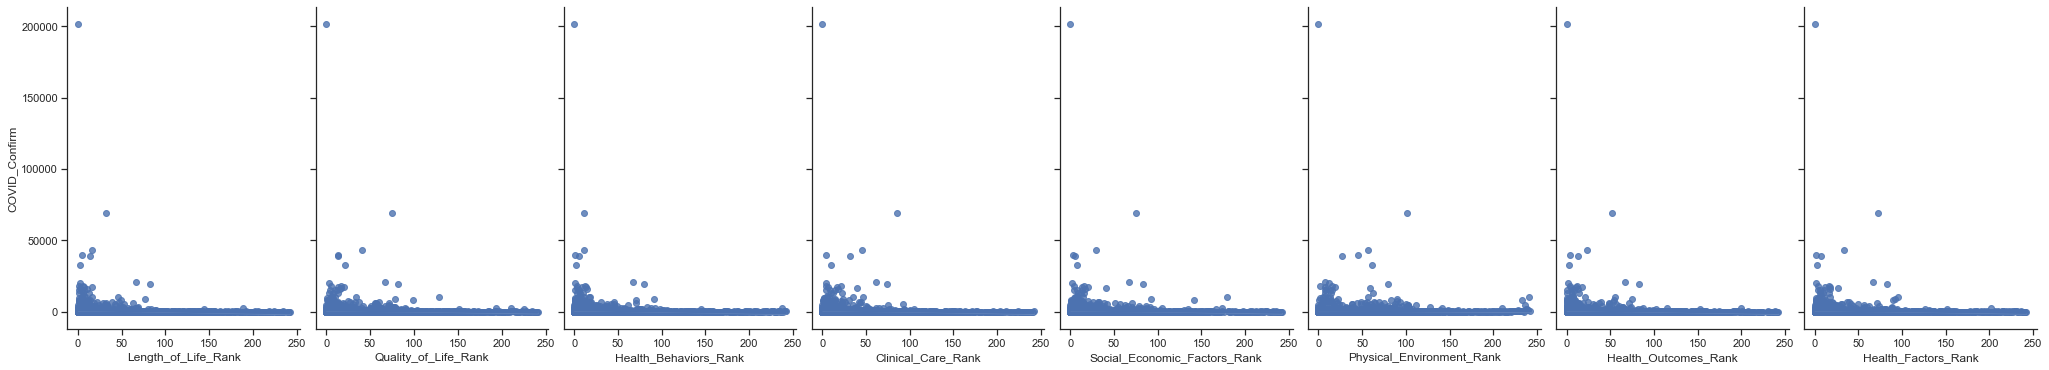

In [159]:
sns.pairplot(COVID_19_522_OVERALL_HEALTH, x_vars=['Length_of_Life_Rank','Quality_of_Life_Rank', 'Health_Behaviors_Rank', 'Clinical_Care_Rank', 'Social_Economic_Factors_Rank', 'Physical_Environment_Rank', 'Health_Outcomes_Rank', 'Health_Factors_Rank'],  y_vars='COVID_Confirm', height=5, aspect=0.7, kind='reg')

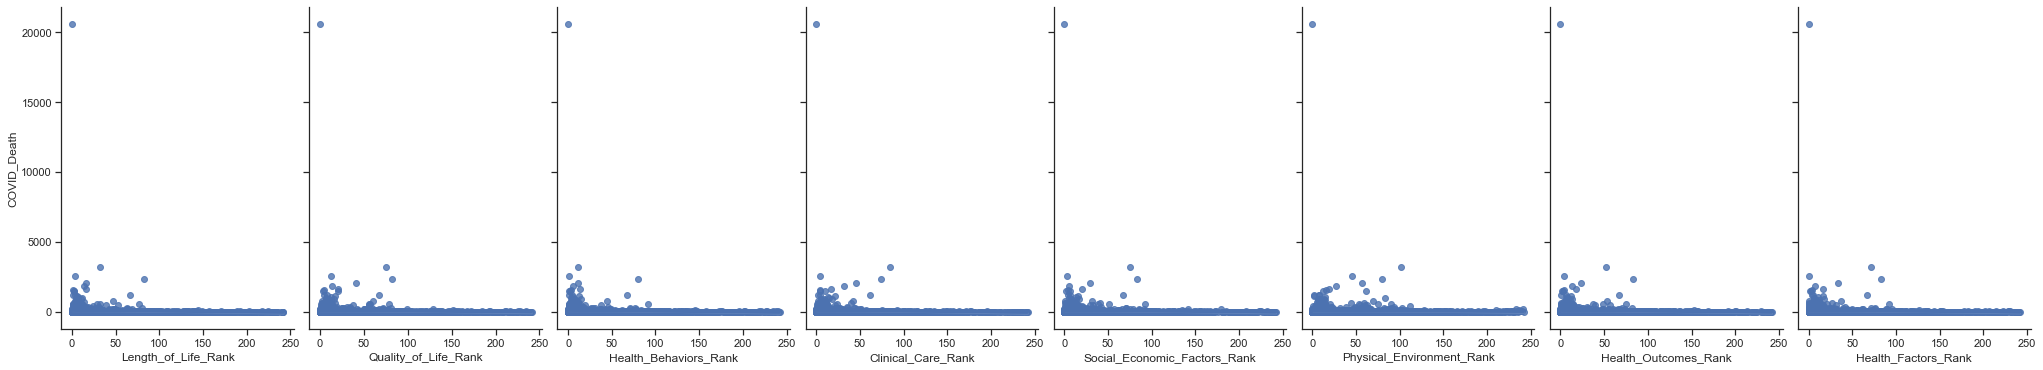

In [158]:
sns.pairplot(COVID_19_522_OVERALL_HEALTH, x_vars=['Length_of_Life_Rank','Quality_of_Life_Rank', 'Health_Behaviors_Rank', 'Clinical_Care_Rank', 'Social_Economic_Factors_Rank', 'Physical_Environment_Rank', 'Health_Outcomes_Rank', 'Health_Factors_Rank'],  y_vars='COVID_Death', height=5, aspect=0.7, kind='reg')

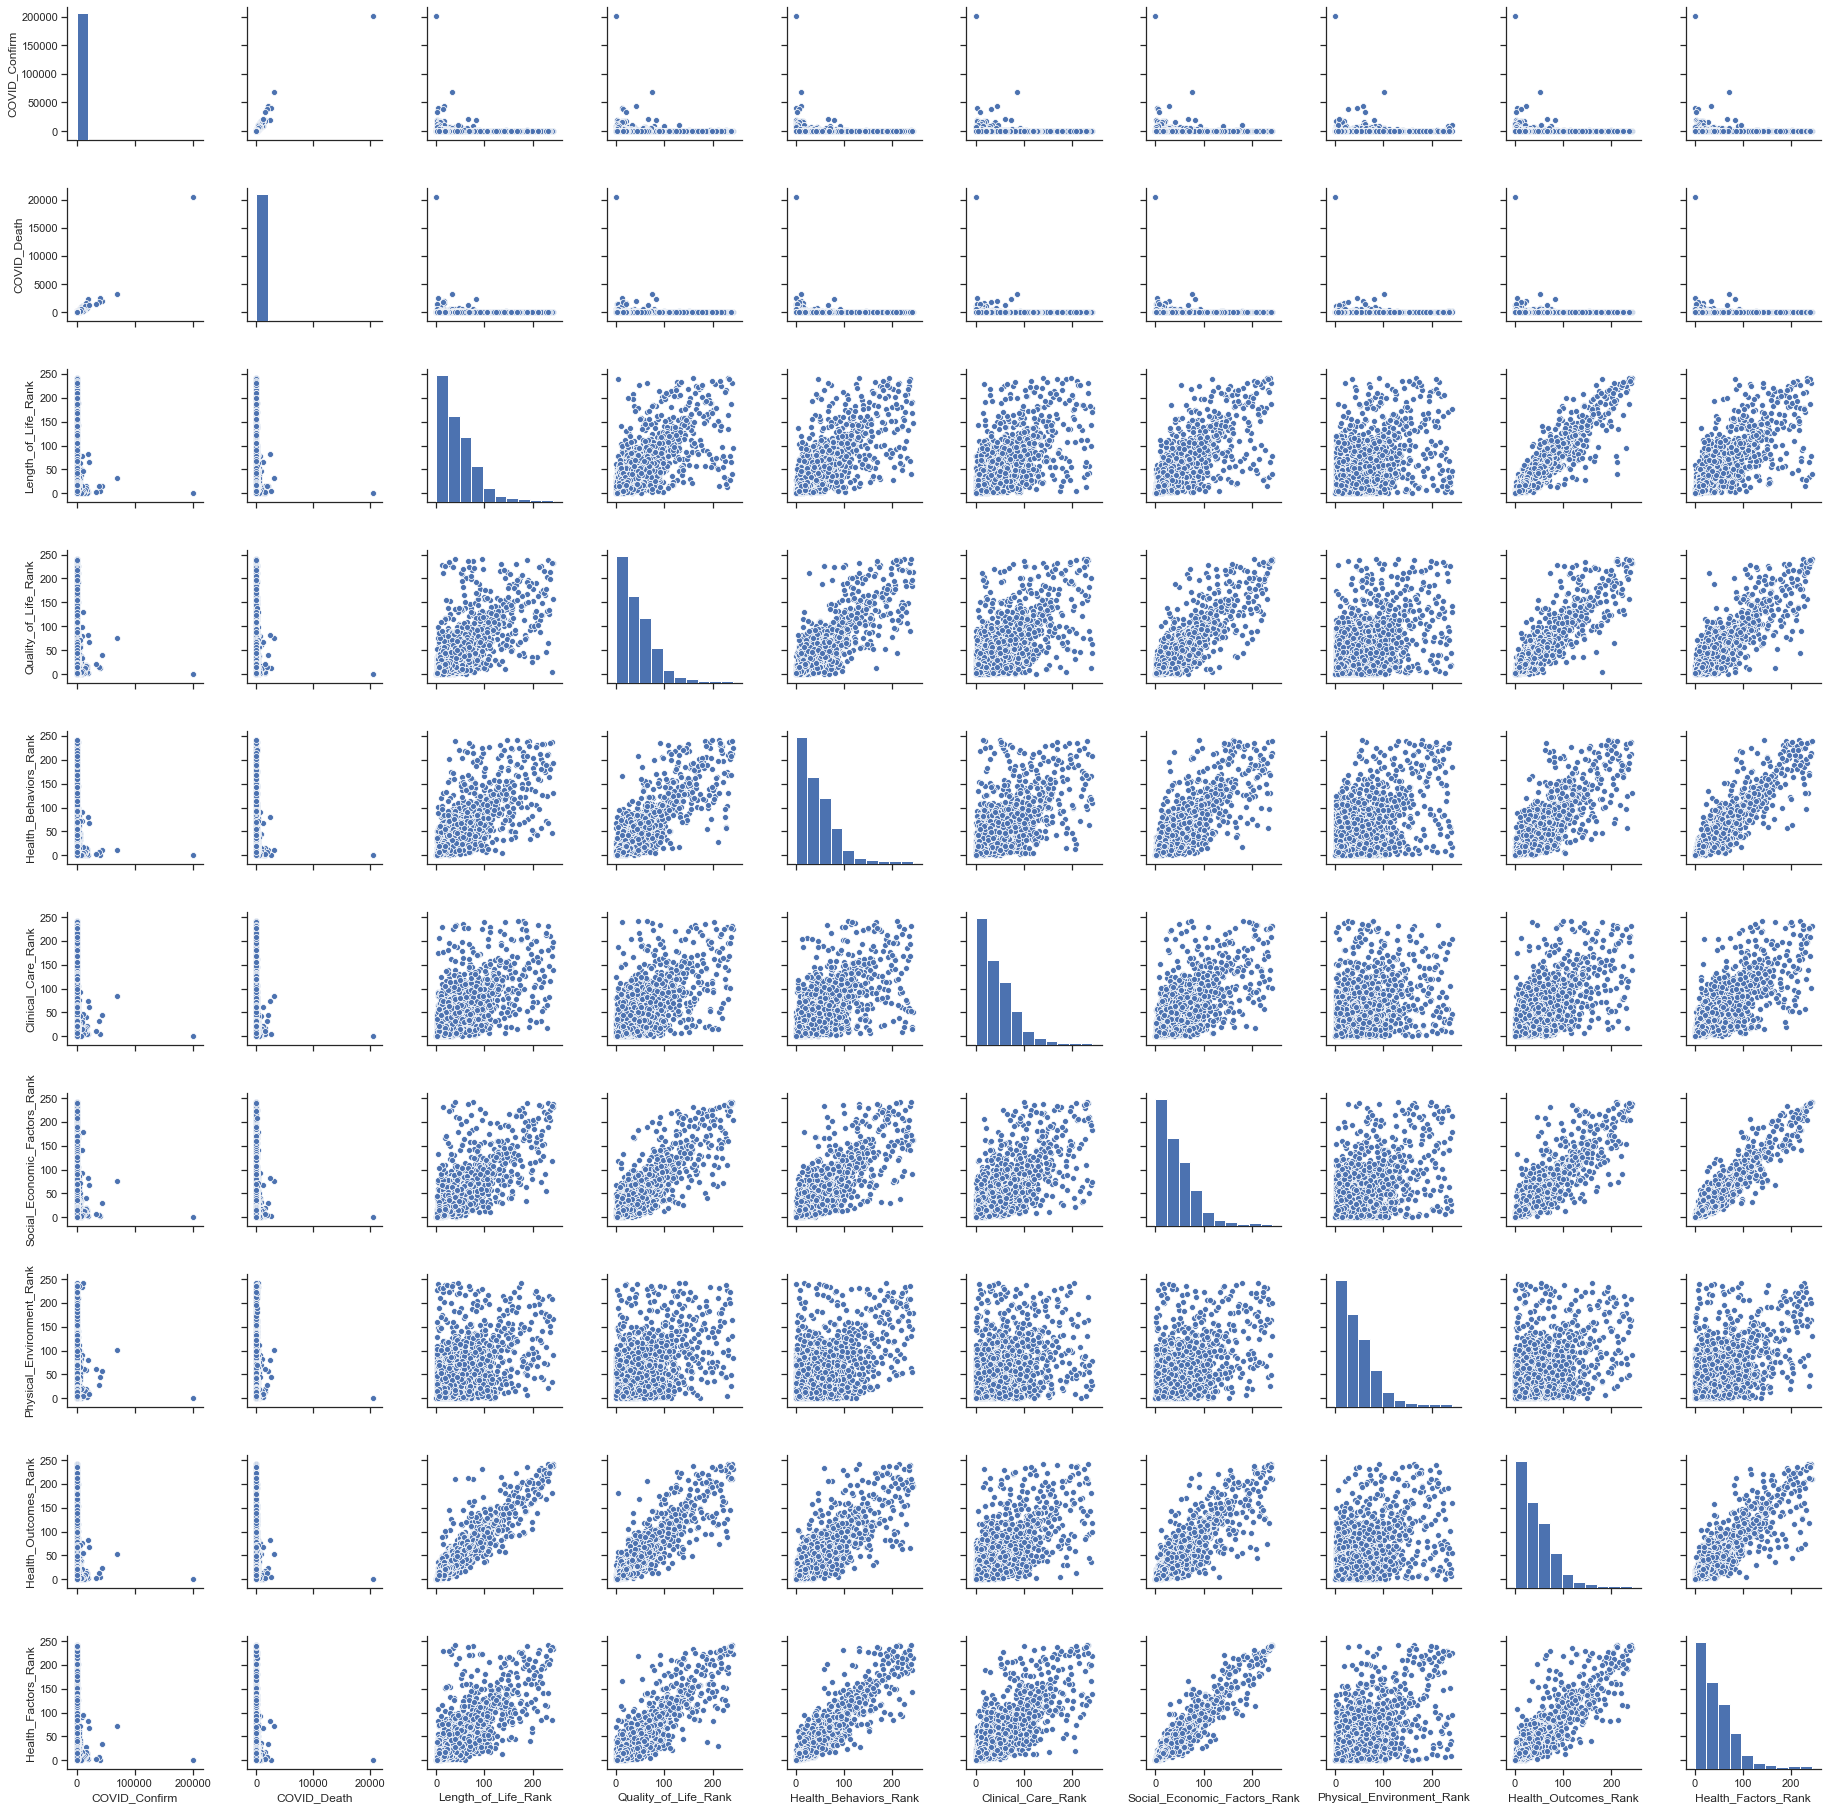

In [156]:
sns.set(style="ticks", color_codes=True)
pairp=g = sns.pairplot(COVID_19_522_OVERALL_HEALTH)
plt.show()


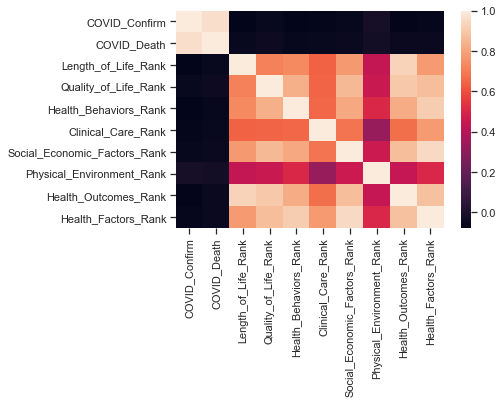

In [154]:
corr = COVID_19_522_OVERALL_HEALTH.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = False

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr)
plt.show()

In [170]:
COVID_19_522_OVERALL_HEALTH.tail(1215)


,State,State_Name,County_Name,COVID_Confirm,COVID_Death,Length_of_Life_Rank,Quality_of_Life_Rank,Health_Behaviors_Rank,Clinical_Care_Rank,Social_Economic_Factors_Rank,Physical_Environment_Rank,Health_Outcomes_Rank,Health_Factors_Rank
1739,NY,New York,Madison,297,4,26,8,32,20,20,34,16,23
1740,NY,New York,Monroe,2602,181,22,50,25,19,27,25,35,22
1741,NY,New York,Montgomery,77,4,55,51,49,36,60,40,56,58
1742,NY,New York,Nassau,39608,2572,4,13,1,4,3,45,4,1
1743,NY,New York,New York City,201298,20569,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,WY,Wyoming,Sublette,3,0,2,4,5,9,8,17,2,7
2950,WY,Wyoming,Sweetwater,25,0,6,18,20,11,20,19,15,21
2951,WY,Wyoming,Teton,100,1,1,2,1,1,1,15,1,1
2952,WY,Wyoming,Uinta,13,0,18,21,19,6,17,13,21,17


In [193]:
COVID_19_522_OVERALL_HEALTH_MINUSNY = COVID_19_522_OVERALL_HEALTH.drop(COVID_19_522_OVERALL_HEALTH.iloc[1743:1744].index, inplace = True)

In [194]:
df=pd.DataFrame(COVID_19_522_OVERALL_HEALTH_MINUSNY)

In [195]:
df.head()

""
